# Data Selecting and Preprocessing for Analysis Of The Factors Affecting The Happiness Score

References:
World Happiness Report [https://www.kaggle.com/unsdsn/world-happiness/]

ISO Country Codes – Global [https://www.kaggle.com/andradaolteanu/iso-country-codes-global]

Land area (sq. km) [https://data.worldbank.org/indicator/AG.LND.TOTL.K2]

Population [https://data.worldbank.org/indicator/SP.POP.TOTL?end=2019&start=2019]

List of cities by average temperature [https://www.wikiwand.com/en/List_of_cities_by_average_temperature]

Medical doctors per 10000 population [https://apps.who.int/gho/data/node.main.HWFGRP_0020?lang=en]

Suicide rate estimates, age-standardized Estimates by country [https://apps.who.int/gho/data/node.main.MHSUICIDEASDR?lang=en]

Road traffic injuries - Estimates by country [https://apps.who.int/gho/data/node.main.SDG36?lang=en]

Education Index [https://www.wikiwand.com/en/Education_Index->http://hdr.undp.org/en/indicators/103706]

Food Production Data [http://www.fao.org/faostat/en/#data/FBS/visualize]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
from sklearn import linear_model
import statsmodels.api as sm

In [2]:
df_happiness = pd.read_csv('2019.csv')
df_happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [3]:
df_happiness.dtypes 

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

In [4]:
#ülke verisi:
df_code = pd.read_csv('wikipedia-iso-country-codes.csv')
df_code.head(3)

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE


In [5]:
#ülke verisi düzenleme:
df_code = df_code.rename(columns={"English short name lower case": "Country"})
df_code = df_code['Country']
df_code.head(3)

0    Zimbabwe
1      Zambia
2       Yemen
Name: Country, dtype: object

In [6]:
#score verisi düzenleme
df_happiness = df_happiness.rename(columns={"Country or region": "Country"})
df_happiness.tail(3)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [7]:
#country or area'dan area removed
df_happiness = pd.merge(df_happiness, df_code, how="inner", on="Country")
df_happiness

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
139,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
140,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
141,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
142,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [8]:
#land area verisi düzenleme
df_land_area = pd.read_csv('API_AG.LND.TOTL.K2_DS2_en_csv_v2_2254009.csv')
df_land_area = df_land_area[["Country Name","2016"]]

#rename a specific column
df_land_area = df_land_area.rename(columns={'2016': 'Land area'}).rename(columns={'Country Name': 'Country'})
df_land_area.tail(3)

,Country,Land area
261,South Africa,1213090
262,Zambia,743390
263,Zimbabwe,386850


In [9]:
#land area'yı ground truth ile birleştirme
df_happiness = pd.merge(df_happiness, df_land_area, how="left", on="Country")
df_happiness

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670
...,...,...,...,...,...,...,...,...,...,...
139,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,527970
140,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,24670
141,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,885800
142,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,652860


In [10]:
df_happiness.dtypes

Overall rank                      int64
Country                          object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Land area                        object
dtype: object

In [11]:
df_happiness
df_happiness['Land area'] = df_happiness['Land area'].astype(float)

In [12]:
df_test = df_happiness.loc[df_happiness['Land area'].isna()]
df_test

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area
24,25,Taiwan,6.446,1.368,1.430,0.914,0.351,0.242,0.097,NaN
78,86,Kyrgyzstan,5.261,0.551,1.438,0.723,0.508,0.300,0.023,NaN
124,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135,NaN


In [13]:
df_happiness.at[24,'Land area']=36193
df_happiness.at[78,'Land area']=199900
df_happiness.at[124,'Land area']=17364
df_test = df_happiness.loc[df_happiness['Land area'].isna()]
df_test

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area


In [14]:
#populasyon verisi ekleme ve düzenleme
df_population = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv')
df_population = df_population[["Country Name","2019"]]

#rename a specific column
df_population = df_population.rename(columns={'2019': 'Population'}).rename(columns={'Country Name': 'Country'})
df_population.tail(3)

,Country,Population
261,South Africa,58558270.0
262,Zambia,17861030.0
263,Zimbabwe,14645468.0


In [15]:
#populasyon verisi'ni ground truth ile birleştirme
df_happiness = pd.merge(df_happiness, df_population, how="left", on="Country")

In [16]:
df_test = df_happiness.loc[df_happiness['Population'].isna()]
df_test

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population
24,25,Taiwan,6.446,1.368,1.430,0.914,0.351,0.242,0.097,36193.0,NaN
37,38,Slovakia,6.198,1.246,1.504,0.881,0.334,0.121,0.014,48080.0,NaN
51,54,South Korea,5.895,1.301,1.219,1.036,0.159,0.175,0.056,97489.0,NaN
64,68,Russia,5.648,1.183,1.452,0.726,0.334,0.082,0.031,16376870.0,NaN
78,86,Kyrgyzstan,5.261,0.551,1.438,0.723,0.508,0.300,0.023,199900.0,NaN
94,103,Congo (Brazzaville),4.812,0.673,0.799,0.508,0.372,0.105,0.093,341500.0,NaN
98,108,Venezuela,4.707,0.960,1.427,0.805,0.154,0.064,0.047,882050.0,NaN
106,117,Iran,4.548,1.100,0.842,0.785,0.305,0.270,0.125,1628760.0,NaN
109,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,10120.0,NaN
116,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,2267050.0,NaN


In [17]:
df_happiness.at[24,'Population']=23773876
df_happiness.at[37,'Population']=5450000
df_happiness.at[51,'Population']=51710000000
df_happiness.at[64,'Population']=144400000
df_happiness.at[78,'Population']=6457000
df_happiness.at[94,'Population']=5381000
df_happiness.at[98,'Population']=28520000
df_happiness.at[106,'Population']=2348000
df_happiness.at[116,'Population']=52000
df_happiness.at[126,'Population']=100400000
df_happiness.at[139,'Population']=29160000
df_happiness.at[109,'Population']=2348000
df_happiness.at[124,'Population']=29160000

df_test = df_happiness.loc[df_happiness['Population'].isna()]
df_test

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population


In [18]:
df_population.dtypes

Country        object
Population    float64
dtype: object

In [19]:
#kişi başına düşen km2 hesabı kolonu ekleme
#df_happiness["Land area per capita"] = df_happiness["Land area"] / df_happiness["Population"]
df_happiness

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0
...,...,...,...,...,...,...,...,...,...,...,...
139,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,527970.0,29160000.0
140,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,24670.0,12626950.0
141,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,885800.0,58005463.0
142,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,652860.0,38041754.0


# weather data :

In [20]:
#weather data ekleme/düzenleme
df_weather = pd.read_csv('AVG_TEMPERATURE.csv', decimal=",")
df_weather = df_weather[["Country","Average_temperature"]].rename(columns={'Average_temperature': 'Average temperature'})
df_weather['Average temperature'] = [x.replace(',', '.').replace("−", "-") for x in df_weather['Average temperature']]
#df_weather.dtypes
df_weather['Average temperature'] = df_weather['Average temperature'].astype(float)
df_weather.tail(3)

,Country,Average temperature
450,Canada,5.0
451,Canada,3.0
452,Russia,1.0


In [21]:
df_weather.dtypes

Country                 object
Average temperature    float64
dtype: object

In [22]:
#weather datayı ülke bazlı hale getirme
df_weather_pivot = pd.pivot_table(df_weather, values='Average temperature', index=['Country'],
                     aggfunc=np.mean)
df_weather_pivot.tail

<bound method NDFrame.tail of              Average temperature
Country                         
Afghanistan            12.100000
Albania                15.200000
Algeria                22.466667
Andorra                 9.800000
Angola                 25.800000
...                          ...
Venezuela              22.000000
Vietnam                23.675000
Yemen                  24.550000
Zambia                 20.666667
Zimbabwe               18.650000

[175 rows x 1 columns]>

In [23]:
#weather datayı ground truth ile birleştirme
df_happiness = pd.merge(df_happiness, df_weather_pivot, how="left", on="Country")
df_happiness

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000
...,...,...,...,...,...,...,...,...,...,...,...,...
139,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,527970.0,29160000.0,24.550000
140,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,24670.0,12626950.0,NaN
141,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,885800.0,58005463.0,24.375000
142,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,652860.0,38041754.0,12.100000


In [24]:
df_happiness.dtypes

Overall rank                      int64
Country                          object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Land area                       float64
Population                      float64
Average temperature             float64
dtype: object

In [25]:
#weather datayı merge edince weather kolonunda eksik veri var mı kontrolü? 
df_na_weather = df_happiness.loc[df_happiness['Average temperature'].isna()]
df_na_weather

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature
20,21,United Arab Emirates,6.825,1.503,1.310,0.825,0.598,0.262,0.182,71020.0,9770529.0,NaN
26,27,Guatemala,6.436,0.800,1.269,0.746,0.535,0.175,0.078,107160.0,16604026.0,NaN
28,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,11490.0,2832067.0,NaN
54,57,Mauritius,5.888,1.120,1.402,0.798,0.498,0.215,0.060,2030.0,1265711.0,NaN
87,95,Bhutan,5.082,0.813,1.321,0.604,0.457,0.370,0.167,38144.0,763092.0,NaN
92,101,Jordan,4.906,0.837,1.225,0.815,0.383,0.110,0.130,88780.0,10101694.0,NaN
94,103,Congo (Brazzaville),4.812,0.673,0.799,0.508,0.372,0.105,0.093,341500.0,5381000.0,NaN
102,113,Namibia,4.639,0.879,1.313,0.477,0.401,0.070,0.056,823290.0,2494530.0,NaN
109,120,Gambia,4.516,0.308,0.939,0.428,0.382,0.269,0.167,10120.0,2348000.0,NaN
116,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,2267050.0,52000.0,NaN


In [26]:
#weather eksik veriler, koordinatlar baz alınarak doldurulacak, coordinate eksik verisi var mı kontrolü için coord datası ekleme:
df_coord = pd.read_csv('countries_coordinates.csv')
df_coord = df_coord[["name","latitude","longitude"]]
df_coord = df_coord.rename(columns={'name': 'Country'}).rename(columns={'latitude': 'Latitude'}).rename(columns={'longitude': 'Longitude'})
df_coord.tail(3)

,Country,Latitude,Longitude
242,South Africa,-30.559482,22.937506
243,Zambia,-13.133897,27.849332
244,Zimbabwe,-19.015438,29.154857


In [27]:
#coordinates datasını ground truth ile birleştirme
df_happiness = pd.merge(df_happiness, df_coord, how="left", on="Country")
df_happiness.tail(3)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude
141,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,885800.0,58005463.0,24.375,-6.369028,34.888822
142,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,652860.0,38041754.0,12.100,33.939110,67.709953
143,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,622980.0,4745185.0,26.250,6.611111,20.939444


In [28]:
#eksik coordinates verisi var mı tespit etme: sadece 3 satır eksik
df_na_latitude = df_happiness.loc[df_happiness['Latitude'].isna()]
df_na_longitude = df_happiness.loc[df_happiness['Longitude'].isna()]
df_na_latitude
df_na_longitude

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude
94,103,Congo (Brazzaville),4.812,0.673,0.799,0.508,0.372,0.105,0.093,341500.0,5381000.0,NaN,NaN,NaN
116,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,2267050.0,52000.0,NaN,NaN,NaN
120,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172,653080.0,54045420.0,27.75,NaN,NaN


In [29]:
##eksik lat ve long lar ground truth'a elle eklendi
df_happiness['Latitude'][94]  = -4.267778
df_happiness['Latitude'][116] = -4.322447
df_happiness['Latitude'][120] = 21.913965
df_happiness['Longitude'][94]  = 15.291944
df_happiness['Longitude'][116] = 15.307045
df_happiness['Longitude'][120] = 95.956223
df_happiness.tail(3)

C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude
141,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,885800.0,58005463.0,24.375,-6.369028,34.888822
142,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,652860.0,38041754.0,12.100,33.939110,67.709953
143,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,622980.0,4745185.0,26.250,6.611111,20.939444


In [30]:
df_na_latitude = df_happiness.loc[df_happiness['Latitude'].isna()]
df_na_longitude = df_happiness.loc[df_happiness['Longitude'].isna()]
df_na_latitude
df_na_longitude
#na coord. verisi kalmadı

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude


C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Longitude')

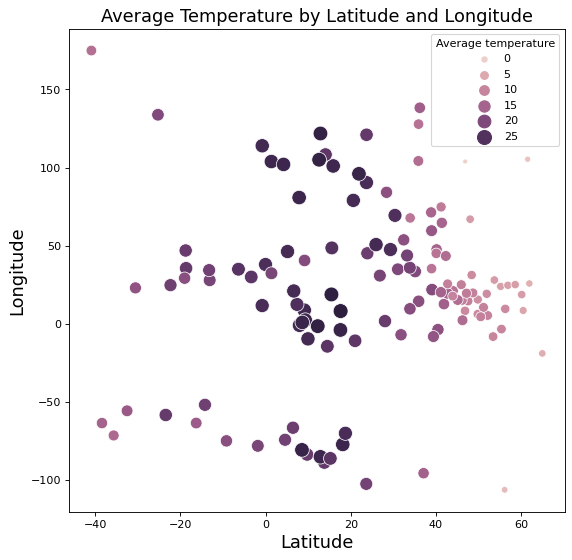

In [31]:
#eksik veriler koordinat ile tahmin edilebilir mi? regresyon var mı bulunması: sonuçta latitude kullanılabilir bence. ileride lattitude regresyonuna bakıldı nonlinear bulundu
plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot('Latitude', 'Longitude', data=df_happiness,
hue='Average temperature',size='Average temperature',sizes=(20, 180)); plt.title('Average Temperature by Latitude and Longitude', size=16); 
plt.xlabel('Latitude', size=16); plt.ylabel('Longitude', size=16) 

In [32]:
#latitude ile avg temp arasındaki regresyonun tespiti için avg temp olmayan veriler ele alındı # 127 row elde edildi
df_no_missing_avg_temp = df_happiness.dropna(subset=['Average temperature'])
df_no_missing_avg_temp

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089,94280.0,18628747.0,21.433333,-13.254308,34.301525
139,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,527970.0,29160000.0,24.550000,15.552727,48.516388
141,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,885800.0,58005463.0,24.375000,-6.369028,34.888822
142,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,652860.0,38041754.0,12.100000,33.939110,67.709953


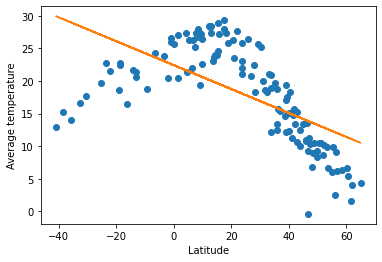

In [33]:
#lattitude-avg_temp arasında linear regression görülmüyor aksine NON-LINEAR REGRESSION --> Quadratic regression: upside-down “U” on a graph -> ileride bunu kullanıcam.
x = df_no_missing_avg_temp['Latitude']
y = df_no_missing_avg_temp['Average temperature']
plt.xlabel("Latitude")
plt.ylabel("Average temperature")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

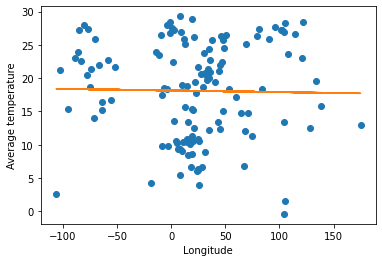

In [34]:
#scatterda ilişki görülmedi ama kontrol amaçlı long-avg temp regresyonuna bakıldı - x = df_no_missing_avg_temp['Longitude']
y = df_no_missing_avg_temp['Average temperature']
plt.xlabel("Longitude")
plt.ylabel("Average temperature")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
#dünya haritası :)

0.17314377497488356


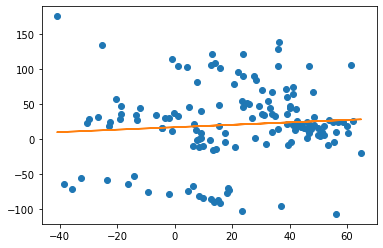

In [35]:
x= df_happiness['Latitude']
y = df_happiness['Longitude']
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
print(m)
#print(model)

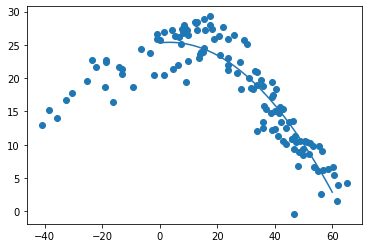

In [36]:
#Quadratic Regression in Python to fill wheather value with using latitude up-down u shape

x=df_no_missing_avg_temp['Latitude']
y=df_no_missing_avg_temp['Average temperature']

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(x, y, 2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(1, 60, 50)
plt.scatter(x, y)
plt.plot(polyline, model(polyline))
plt.show()

In [37]:
print(model)
#weather = -0.007026*(latitude)^2 + 0.04766*(latitude) + 25.3

           2
-0.007026 x + 0.04766 x + 25.3


In [38]:
#modelin r square değeri: 
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(x, y, 2)

#This means that 84.51% of the variation in the reported weather temp. can be explained by the predictor variables(langitude).

{'r_squared': 0.8451527799642087}

In [39]:
#r square tatmin edici old. için model ile tahminleme yapalım:
#weather = -0.007026*(latitude)^2 + 0.04766*(latitude) + 25.3

In [40]:
#df_na_weather verisine de koordinatları ekleyelim:
df_na_weather = pd.merge(df_na_weather, df_coord, how="left", on="Country")
df_na_weather.tail(3)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude
14,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,30360.0,2125268.0,NaN,-29.609988,28.233608
15,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,NaN,18.971187,-72.285215
16,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,24670.0,12626950.0,NaN,-1.940278,29.873888


In [41]:
#df_na_weather df'si avg_temp olmayanlar içindi: bu veriyi model yardımıyla dolduralım:
df_na_weather['Average temperature']=((-0.007026*(df_na_weather['Latitude']))*(-0.007026*(df_na_weather['Latitude']))) + (0.04766*(df_na_weather['Latitude'])) + 25.3
df_na_weather.tail(3)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude
14,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,30360.0,2125268.0,23.932069,-29.609988,28.233608
15,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215
16,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,24670.0,12626950.0,25.207712,-1.940278,29.873888


In [42]:
#weather tahmin edilen df ile without weather olan df'yi birleştirme #sonuçta yine 143 satırlık avg_tempin olduğu data elde ettik:
frames = [df_no_missing_avg_temp, df_na_weather]
  
df_happiness2 = pd.concat(frames)
df_happiness2

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499
13,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219
14,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,30360.0,2125268.0,23.932069,-29.609988,28.233608
15,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215


In [43]:
df_test = df_happiness2.loc[df_happiness2['Average temperature'].isna()]
df_test
# Delete row at index position 0 & 1
df_happiness2 = df_happiness2.drop([df_happiness2.index[6] , df_happiness2.index[9]])

In [44]:
df_test = df_happiness2.loc[df_happiness2['Average temperature'].isna()]
df_test

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude


In [45]:
df_happiness2

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499
13,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219
14,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,30360.0,2125268.0,23.932069,-29.609988,28.233608
15,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215


# doktor verisi

In [46]:
#doktor verisi ekleme ve düzenleme
df_doc_per_10000 = pd.read_csv('doctor.csv')
df_doc_per_10000.drop(df_doc_per_10000[df_doc_per_10000.Year < 2009].index, inplace=True)
df_doc_per_10000.drop(columns='Medical doctors (number)',inplace=True)
df_doc_per_10000.drop(columns='Generalist medical practitioners (number)',inplace=True)
df_doc_per_10000.drop(columns='Specialist medical practitioners (number)',inplace=True)
df_doc_per_10000.drop(columns='Medical doctors not further defined (number)',inplace=True)
df_doc_per_10000['Country'] = [x.replace('Viet Nam', 'Vietnam') for x in df_doc_per_10000['Country']]
df_doc_per_10000['Country'] = [x.replace('United States of America', 'United States') for x in df_doc_per_10000['Country']]
df_doc_per_10000['Country'] = [x.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom') for x in df_doc_per_10000['Country']]
df_doc_per_10000 
#df_doc_per_10000.dtypes

,Country,Year,Medical doctors (per 10 000 population)
0,Afghanistan,2016,2.782
1,Afghanistan,2015,2.850
2,Afghanistan,2014,2.983
3,Afghanistan,2013,2.846
4,Afghanistan,2012,2.414
...,...,...,...
2835,Zimbabwe,2013,0.834
2836,Zimbabwe,2012,0.807
2837,Zimbabwe,2011,0.817
2838,Zimbabwe,2010,1.272


In [47]:
#happinessta olan ülkeleri bırakma
df_doc_per_10000 = df_doc_per_10000.loc[df_doc_per_10000['Country'].isin(df_happiness2['Country'])]
df_doc_per_10000

,Country,Year,Medical doctors (per 10 000 population)
0,Afghanistan,2016,2.782
1,Afghanistan,2015,2.850
2,Afghanistan,2014,2.983
3,Afghanistan,2013,2.846
4,Afghanistan,2012,2.414
...,...,...,...
2835,Zimbabwe,2013,0.834
2836,Zimbabwe,2012,0.807
2837,Zimbabwe,2011,0.817
2838,Zimbabwe,2010,1.272


In [48]:
#show years in columns instead of rows
years = df_doc_per_10000.pivot(index='Year',values='Medical doctors (per 10 000 population)' ,columns='Country')
years 

Country,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,Belarus,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
2009,2.126,12.297,NaN,NaN,27.679,31.085,36.751,9.695,3.544,32.845,...,34.904,15.177,52.479,NaN,NaN,25.706,6.982,3.165,0.606,1.210
2010,2.365,12.347,NaN,NaN,28.419,33.429,36.629,9.493,3.635,32.498,...,34.830,14.195,52.462,NaN,NaN,25.432,7.100,NaN,0.614,1.272
2011,2.518,12.217,NaN,NaN,28.677,32.878,34.376,9.451,3.839,47.611,...,34.842,14.369,53.144,NaN,NaN,25.036,NaN,NaN,NaN,0.817
2012,2.414,12.683,NaN,NaN,28.968,32.858,34.901,9.570,4.001,48.352,...,34.910,14.767,53.284,NaN,NaN,24.451,8.209,NaN,NaN,0.807
2013,2.846,12.773,NaN,39.385,29.031,33.530,34.558,9.536,4.218,48.534,...,34.965,17.413,53.546,NaN,NaN,24.044,NaN,NaN,NaN,0.834
2014,2.983,NaN,NaN,NaN,28.928,34.314,34.460,9.573,4.887,50.120,...,29.923,19.953,54.258,NaN,NaN,23.742,7.830,5.251,NaN,1.240
2015,2.850,NaN,NaN,39.900,29.143,34.886,NaN,9.257,4.858,51.905,...,NaN,22.111,54.864,NaN,NaN,NaN,7.963,NaN,NaN,1.815
2016,2.782,12.164,18.325,40.013,NaN,35.672,NaN,NaN,4.974,NaN,...,NaN,23.710,55.095,NaN,39.558,NaN,8.281,NaN,0.925,1.788
2017,NaN,NaN,NaN,39.901,44.023,36.778,NaN,NaN,5.433,NaN,...,NaN,24.356,55.691,NaN,49.398,NaN,NaN,NaN,NaN,1.859


In [49]:
#turkey için yıl için sürekli bir artış var mı bakıldı:
df_doc_per_10000_tr = df_doc_per_10000.loc[df_doc_per_10000['Country'] == 'Turkey' ]
df_doc_per_10000_tr.drop(df_doc_per_10000_tr[df_doc_per_10000_tr.Year < 2009].index, inplace=True)
df_doc_per_10000_tr

C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\pandas\core\frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Year,Medical doctors (per 10 000 population)
2612,Turkey,2018,18.065
2613,Turkey,2017,18.492
2614,Turkey,2016,18.142
2615,Turkey,2015,17.988
2616,Turkey,2014,17.560
2617,Turkey,2013,17.619
2618,Turkey,2012,17.384
2619,Turkey,2011,17.160
2620,Turkey,2010,17.068
2621,Turkey,2009,16.635


In [50]:
df_doc_per_10000_tr.dtypes

Country                                     object
Year                                         int64
Medical doctors (per 10 000 population)    float64
dtype: object

C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Country')

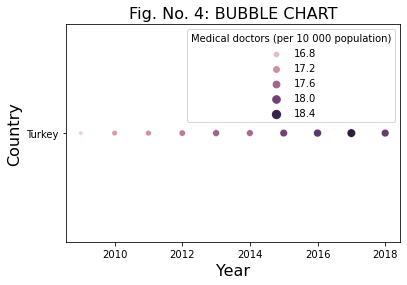

In [51]:
#turkey için yıl için sürekli bir artış var mı bakıldı:
sns.scatterplot('Year', 'Country', data=df_doc_per_10000_tr,
hue='Medical doctors (per 10 000 population)',size='Medical doctors (per 10 000 population)'); plt.title('Fig. No. 4: BUBBLE CHART', size=16); 
plt.xlabel('Year', size=16); plt.ylabel('Country', size=16) 

0.1787939393939488


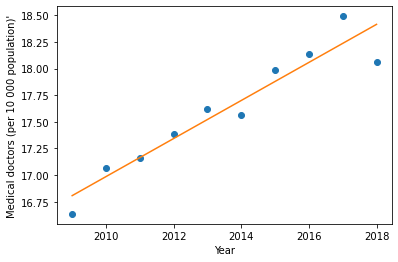

In [52]:
x = df_doc_per_10000_tr['Year']
y = df_doc_per_10000_tr['Medical doctors (per 10 000 population)']
plt.xlabel("Year")
plt.ylabel("Medical doctors (per 10 000 population)'")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
print(m)
#linear regresyon

In [53]:
#modelin r square değeri: 
#define function to calculate r-squared
def polyfit(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    #calculate r-squared
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = ssreg / sstot

    return results

#find r-squared of polynomial model with degree = 3
polyfit(x, y, 2)

#This means that 92.64% of the variation in the reported doctor value can be explained by the predictor variables(year) for a country.

{'r_squared': 0.9264622671013628}

In [54]:
#pivot to df'ye 
df_doc_per_10000_2 = pd.DataFrame(years.to_records())
df_doc_per_10000_2

,Year,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
0,2009,2.126,12.297,NaN,NaN,27.679,31.085,36.751,9.695,3.544,...,34.904,15.177,52.479,NaN,NaN,25.706,6.982,3.165,0.606,1.210
1,2010,2.365,12.347,NaN,NaN,28.419,33.429,36.629,9.493,3.635,...,34.830,14.195,52.462,NaN,NaN,25.432,7.100,NaN,0.614,1.272
2,2011,2.518,12.217,NaN,NaN,28.677,32.878,34.376,9.451,3.839,...,34.842,14.369,53.144,NaN,NaN,25.036,NaN,NaN,NaN,0.817
3,2012,2.414,12.683,NaN,NaN,28.968,32.858,34.901,9.570,4.001,...,34.910,14.767,53.284,NaN,NaN,24.451,8.209,NaN,NaN,0.807
4,2013,2.846,12.773,NaN,39.385,29.031,33.530,34.558,9.536,4.218,...,34.965,17.413,53.546,NaN,NaN,24.044,NaN,NaN,NaN,0.834
5,2014,2.983,NaN,NaN,NaN,28.928,34.314,34.460,9.573,4.887,...,29.923,19.953,54.258,NaN,NaN,23.742,7.830,5.251,NaN,1.240
6,2015,2.850,NaN,NaN,39.900,29.143,34.886,NaN,9.257,4.858,...,NaN,22.111,54.864,NaN,NaN,NaN,7.963,NaN,NaN,1.815
7,2016,2.782,12.164,18.325,40.013,NaN,35.672,NaN,NaN,4.974,...,NaN,23.710,55.095,NaN,39.558,NaN,8.281,NaN,0.925,1.788
8,2017,NaN,NaN,NaN,39.901,44.023,36.778,NaN,NaN,5.433,...,NaN,24.356,55.691,NaN,49.398,NaN,NaN,NaN,NaN,1.859
9,2018,NaN,21.584,17.193,NaN,NaN,37.595,NaN,NaN,5.809,...,NaN,25.278,56.162,26.036,NaN,NaN,NaN,NaN,NaN,2.096


<AxesSubplot:>

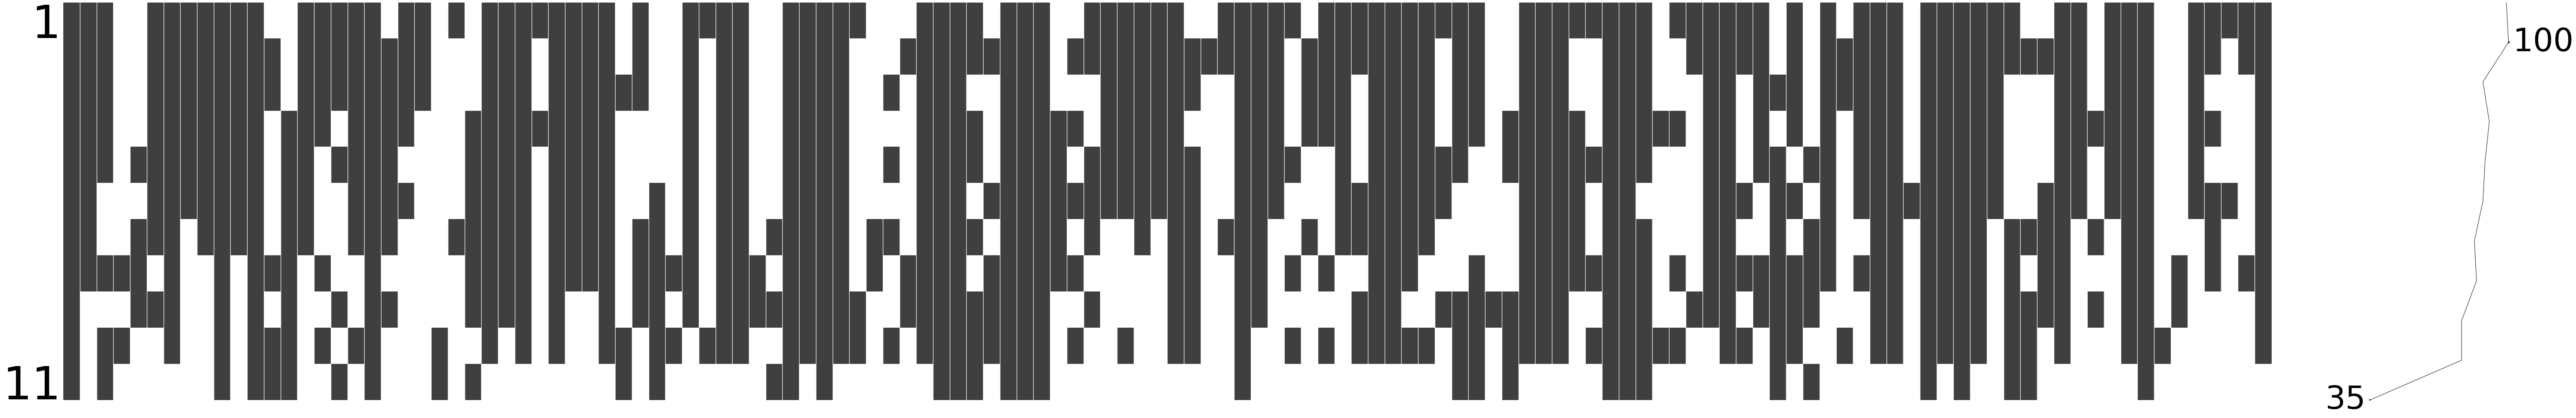

In [55]:
#2009-2019 arası missing valıe analizi
import missingno as mno
mno.matrix(df_doc_per_10000_2, figsize = (120, 20),fontsize=100)

In [56]:
df_doc_per_10000_3 = df_doc_per_10000_2
df_doc_per_10000_2019 = df_doc_per_10000_3
df_doc_per_10000_2019 = df_doc_per_10000_2019.loc[df_doc_per_10000_2019['Year'] == 2019]
df_doc_per_10000_2019

,Year,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
10,2019,NaN,16.471,NaN,NaN,NaN,NaN,NaN,NaN,6.367,...,NaN,NaN,58.233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
df_doc_per_10000_not_2019 = df_doc_per_10000_3
df_doc_per_10000_not_2019 = df_doc_per_10000_not_2019.loc[df_doc_per_10000_not_2019['Year'] < 2019]
df_doc_per_10000_not_2019

,Year,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
0,2009,2.126,12.297,NaN,NaN,27.679,31.085,36.751,9.695,3.544,...,34.904,15.177,52.479,NaN,NaN,25.706,6.982,3.165,0.606,1.210
1,2010,2.365,12.347,NaN,NaN,28.419,33.429,36.629,9.493,3.635,...,34.830,14.195,52.462,NaN,NaN,25.432,7.100,NaN,0.614,1.272
2,2011,2.518,12.217,NaN,NaN,28.677,32.878,34.376,9.451,3.839,...,34.842,14.369,53.144,NaN,NaN,25.036,NaN,NaN,NaN,0.817
3,2012,2.414,12.683,NaN,NaN,28.968,32.858,34.901,9.570,4.001,...,34.910,14.767,53.284,NaN,NaN,24.451,8.209,NaN,NaN,0.807
4,2013,2.846,12.773,NaN,39.385,29.031,33.530,34.558,9.536,4.218,...,34.965,17.413,53.546,NaN,NaN,24.044,NaN,NaN,NaN,0.834
5,2014,2.983,NaN,NaN,NaN,28.928,34.314,34.460,9.573,4.887,...,29.923,19.953,54.258,NaN,NaN,23.742,7.830,5.251,NaN,1.240
6,2015,2.850,NaN,NaN,39.900,29.143,34.886,NaN,9.257,4.858,...,NaN,22.111,54.864,NaN,NaN,NaN,7.963,NaN,NaN,1.815
7,2016,2.782,12.164,18.325,40.013,NaN,35.672,NaN,NaN,4.974,...,NaN,23.710,55.095,NaN,39.558,NaN,8.281,NaN,0.925,1.788
8,2017,NaN,NaN,NaN,39.901,44.023,36.778,NaN,NaN,5.433,...,NaN,24.356,55.691,NaN,49.398,NaN,NaN,NaN,NaN,1.859
9,2018,NaN,21.584,17.193,NaN,NaN,37.595,NaN,NaN,5.809,...,NaN,25.278,56.162,26.036,NaN,NaN,NaN,NaN,NaN,2.096


In [58]:
df_doc_per_10000_not_2019=df_doc_per_10000_not_2019.interpolate(method='linear', limit_direction='both', axis=0)
df_doc_per_10000_not_2019

,Year,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
0,2009,2.126,12.297,18.325,39.3850,27.679,31.085,36.751,9.695,3.544,...,34.904,15.177,52.479,26.036,39.558,25.706,6.9820,3.1650,0.606000,1.210
1,2010,2.365,12.347,18.325,39.3850,28.419,33.429,36.629,9.493,3.635,...,34.830,14.195,52.462,26.036,39.558,25.432,7.1000,3.5822,0.614000,1.272
2,2011,2.518,12.217,18.325,39.3850,28.677,32.878,34.376,9.451,3.839,...,34.842,14.369,53.144,26.036,39.558,25.036,7.6545,3.9994,0.665833,0.817
3,2012,2.414,12.683,18.325,39.3850,28.968,32.858,34.901,9.570,4.001,...,34.910,14.767,53.284,26.036,39.558,24.451,8.2090,4.4166,0.717667,0.807
4,2013,2.846,12.773,18.325,39.3850,29.031,33.530,34.558,9.536,4.218,...,34.965,17.413,53.546,26.036,39.558,24.044,8.0195,4.8338,0.769500,0.834
5,2014,2.983,12.570,18.325,39.6425,28.928,34.314,34.460,9.573,4.887,...,29.923,19.953,54.258,26.036,39.558,23.742,7.8300,5.2510,0.821333,1.240
6,2015,2.850,12.367,18.325,39.9000,29.143,34.886,34.460,9.257,4.858,...,29.923,22.111,54.864,26.036,39.558,23.742,7.9630,5.2510,0.873167,1.815
7,2016,2.782,12.164,18.325,40.0130,36.583,35.672,34.460,9.257,4.974,...,29.923,23.710,55.095,26.036,39.558,23.742,8.2810,5.2510,0.925000,1.788
8,2017,2.782,16.874,17.759,39.9010,44.023,36.778,34.460,9.257,5.433,...,29.923,24.356,55.691,26.036,49.398,23.742,8.2810,5.2510,0.925000,1.859
9,2018,2.782,21.584,17.193,39.9010,44.023,37.595,34.460,9.257,5.809,...,29.923,25.278,56.162,26.036,49.398,23.742,8.2810,5.2510,0.925000,2.096


In [59]:
frames = [df_doc_per_10000_not_2019, df_doc_per_10000_2019]
  
df_doc_per_10000_4 = pd.concat(frames)
df_doc_per_10000_4

,Year,Afghanistan,Albania,Algeria,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh,...,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Yemen,Zambia,Zimbabwe
0,2009,2.126,12.297,18.325,39.3850,27.679,31.085,36.751,9.695,3.544,...,34.904,15.177,52.479,26.036,39.558,25.706,6.9820,3.1650,0.606000,1.210
1,2010,2.365,12.347,18.325,39.3850,28.419,33.429,36.629,9.493,3.635,...,34.830,14.195,52.462,26.036,39.558,25.432,7.1000,3.5822,0.614000,1.272
2,2011,2.518,12.217,18.325,39.3850,28.677,32.878,34.376,9.451,3.839,...,34.842,14.369,53.144,26.036,39.558,25.036,7.6545,3.9994,0.665833,0.817
3,2012,2.414,12.683,18.325,39.3850,28.968,32.858,34.901,9.570,4.001,...,34.910,14.767,53.284,26.036,39.558,24.451,8.2090,4.4166,0.717667,0.807
4,2013,2.846,12.773,18.325,39.3850,29.031,33.530,34.558,9.536,4.218,...,34.965,17.413,53.546,26.036,39.558,24.044,8.0195,4.8338,0.769500,0.834
5,2014,2.983,12.570,18.325,39.6425,28.928,34.314,34.460,9.573,4.887,...,29.923,19.953,54.258,26.036,39.558,23.742,7.8300,5.2510,0.821333,1.240
6,2015,2.850,12.367,18.325,39.9000,29.143,34.886,34.460,9.257,4.858,...,29.923,22.111,54.864,26.036,39.558,23.742,7.9630,5.2510,0.873167,1.815
7,2016,2.782,12.164,18.325,40.0130,36.583,35.672,34.460,9.257,4.974,...,29.923,23.710,55.095,26.036,39.558,23.742,8.2810,5.2510,0.925000,1.788
8,2017,2.782,16.874,17.759,39.9010,44.023,36.778,34.460,9.257,5.433,...,29.923,24.356,55.691,26.036,49.398,23.742,8.2810,5.2510,0.925000,1.859
9,2018,2.782,21.584,17.193,39.9010,44.023,37.595,34.460,9.257,5.809,...,29.923,25.278,56.162,26.036,49.398,23.742,8.2810,5.2510,0.925000,2.096


In [60]:
#predict 2019
df_doc_per_10000_5=df_doc_per_10000_4
df_doc_per_10000_5=df_doc_per_10000_5.set_index('Year')
df_doc_per_10000_5=df_doc_per_10000_5.transpose()
df_doc_per_10000_5

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Afghanistan,2.126,2.3650,2.518000,2.414000,2.8460,2.983000,2.850000,2.782,2.782,2.782,NaN
Albania,12.297,12.3470,12.217000,12.683000,12.7730,12.570000,12.367000,12.164,16.874,21.584,16.471
Algeria,18.325,18.3250,18.325000,18.325000,18.3250,18.325000,18.325000,18.325,17.759,17.193,NaN
Argentina,39.385,39.3850,39.385000,39.385000,39.3850,39.642500,39.900000,40.013,39.901,39.901,NaN
Armenia,27.679,28.4190,28.677000,28.968000,29.0310,28.928000,29.143000,36.583,44.023,44.023,NaN
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,25.706,25.4320,25.036000,24.451000,24.0440,23.742000,23.742000,23.742,23.742,23.742,NaN
Vietnam,6.982,7.1000,7.654500,8.209000,8.0195,7.830000,7.963000,8.281,8.281,8.281,NaN
Yemen,3.165,3.5822,3.999400,4.416600,4.8338,5.251000,5.251000,5.251,5.251,5.251,NaN
Zambia,0.606,0.6140,0.665833,0.717667,0.7695,0.821333,0.873167,0.925,0.925,0.925,NaN


In [61]:
X = df_doc_per_10000_5[[2009,2010,2011,2012,2013,2014,2015,2016,2017]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df_doc_per_10000_5[2018] 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)
print(predictions)

#2019 = (0.01635935084000195) + (-1.21084139e-01)*X1 + (9.62334743e-02)*X2 ...

Intercept: 
 0.0026995395235154263
Coefficients: 
 [-0.11837033  0.09786059 -0.25378872  0.40249331 -0.26427891  0.81381338
 -0.79601847  0.0041257   1.1451466 ]
                            OLS Regression Results                            
Dep. Variable:                   2018   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1011.
Date:                Mon, 31 May 2021   Prob (F-statistic):          2.23e-109
Time:                        13:55:13   Log-Likelihood:                -286.06
No. Observations:                 131   AIC:                             592.1
Df Residuals:                     121   BIC:                             620.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t     

In [62]:
df_doc_per_10000_5[2019]=predictions
df_doc_per_10000_5

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Afghanistan,2.126,2.3650,2.518000,2.414000,2.8460,2.983000,2.850000,2.782,2.782,2.782,2.919154
Albania,12.297,12.3470,12.217000,12.683000,12.7730,12.570000,12.367000,12.164,16.874,21.584,18.142698
Algeria,18.325,18.3250,18.325000,18.325000,18.3250,18.325000,18.325000,18.325,17.759,17.193,18.247313
Argentina,39.385,39.3850,39.385000,39.385000,39.3850,39.642500,39.900000,40.013,39.901,39.901,41.001065
Armenia,27.679,28.4190,28.677000,28.968000,29.0310,28.928000,29.143000,36.583,44.023,44.023,47.124020
...,...,...,...,...,...,...,...,...,...,...,...
Uzbekistan,25.706,25.4320,25.036000,24.451000,24.0440,23.742000,23.742000,23.742,23.742,23.742,24.290359
Vietnam,6.982,7.1000,7.654500,8.209000,8.0195,7.830000,7.963000,8.281,8.281,8.281,8.663693
Yemen,3.165,3.5822,3.999400,4.416600,4.8338,5.251000,5.251000,5.251,5.251,5.251,5.592061
Zambia,0.606,0.6140,0.665833,0.717667,0.7695,0.821333,0.873167,0.925,0.925,0.925,0.943998


<AxesSubplot:>

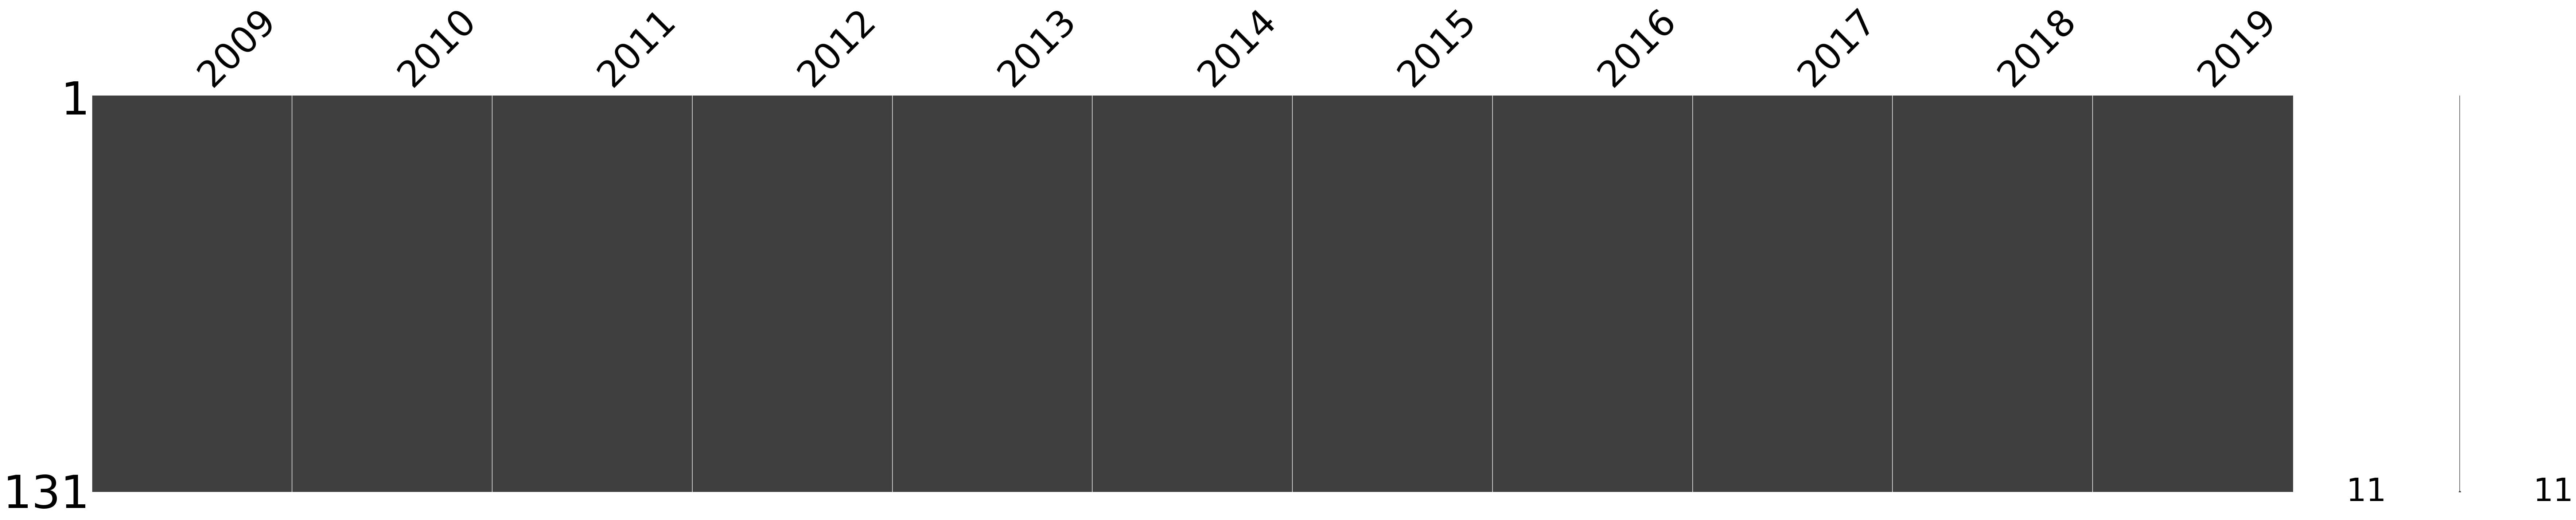

In [63]:
#2009-2019 arası missing valıe analizi
import missingno as mno
mno.matrix(df_doc_per_10000_5, figsize = (120, 20),fontsize=100)

In [64]:
df_doc_per_10000_6=df_doc_per_10000_5
df_doc_per_10000_6=df_doc_per_10000_6.rename(columns={2019:'Doctors per 10000 people'})
df_doc_per_10000_6.columns

Index([                      2009,                       2010,
                             2011,                       2012,
                             2013,                       2014,
                             2015,                       2016,
                             2017,                       2018,
       'Doctors per 10000 people'],
      dtype='object', name='Year')

In [65]:
df_doc_per_10000_6=df_doc_per_10000_5
df_doc_per_10000_6=df_doc_per_10000_6.rename(columns={2019:'Doctors per 10000 people'})
df_doc_per_10000_6=df_doc_per_10000_6.reset_index()
df_doc_per_10000_6=df_doc_per_10000_6.rename(columns={'index':'Country'}).rename(columns={'Year':'index'}).rename(columns={'2019':'Doctors per 10000 people'})
df_doc_per_10000_6=df_doc_per_10000_6.drop(columns=[2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
df_doc_per_10000_6

Year,Country,Doctors per 10000 people
0,Afghanistan,2.919154
1,Albania,18.142698
2,Algeria,18.247313
3,Argentina,41.001065
4,Armenia,47.124020
...,...,...
126,Uzbekistan,24.290359
127,Vietnam,8.663693
128,Yemen,5.592061
129,Zambia,0.943998


In [66]:
#happiness ile doktor verisi birleştirildi: 
df_happiness2 = pd.merge(df_happiness2, df_doc_per_10000_6, how="inner", on="Country")
df_happiness2

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151,49.597738
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785,42.668685
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946,48.638747
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835,40.195043
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266,37.561336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499,0.378408
127,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519
128,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,30360.0,2125268.0,23.932069,-29.609988,28.233608,0.716140
129,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928


In [67]:
df_happiness2.dtypes
df_test = df_happiness2.loc[df_happiness2['Doctors per 10000 people'].isna()]
df_test

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people


In [68]:
df_happiness2.columns

Index(['Overall rank', 'Country', 'Score', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Land area', 'Population',
       'Average temperature', 'Latitude', 'Longitude',
       'Doctors per 10000 people'],
      dtype='object')

# suicide rate estimated data

In [69]:
df_sui_rate_per_100000 = pd.read_csv('suicade_rate_est.csv',decimal=',')
df_sui_rate_per_100000['Country'] = [x.replace('Viet Nam', 'Vietnam') for x in df_sui_rate_per_100000['Country']]
df_sui_rate_per_100000['Country'] = [x.replace('United States of America', 'United States') for x in df_sui_rate_per_100000['Country']]
df_sui_rate_per_100000['Country'] = [x.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom') for x in df_sui_rate_per_100000['Country']]
df_sui_rate_per_100000=df_sui_rate_per_100000.rename(columns={'Suicide rates (per 100 000 population) 2019':'Suicide rates est per 100000 people'})
df_sui_rate_per_100000
#df_sui_rate_per_10000.dtypes 

,Country,Suicide rates est per 100000 people
0,Afghanistan,6.0
1,Albania,3.7
2,Algeria,2.6
3,Antigua and Barbuda,0.3
4,Armenia,2.7
...,...,...
178,United States,14.5
179,Uruguay,18.8
180,Vanuatu,21.0
181,Zimbabwe,23.6


In [70]:
#ground truth ile merge 
df_happiness2 = pd.merge(df_happiness2, df_sui_rate_per_100000, how="left", on="Country")
df_happiness2 

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151,49.597738,13.4
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785,42.668685,7.6
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946,48.638747,9.9
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835,40.195043,11.2
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266,37.561336,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499,0.378408,7.4
127,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5
128,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,30360.0,2125268.0,23.932069,-29.609988,28.233608,0.716140,87.5
129,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928,11.2


In [71]:
df_happiness2.dtypes
df_test = df_happiness2.loc[df_happiness2['Suicide rates est per 100000 people'].isna()]
df_test 

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people


# road traffic dead estimated data

In [72]:
df_road_traff_dead_per_100000 = pd.read_csv('road traffic dead estimates.csv')
df_road_traff_dead_per_100000['Country'] = [x.replace('Viet Nam', 'Vietnam') for x in df_sui_rate_per_100000['Country']]
df_road_traff_dead_per_100000['Country'] = [x.replace('United States of America', 'United States') for x in df_sui_rate_per_100000['Country']]
df_road_traff_dead_per_100000['Country'] = [x.replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom') for x in df_sui_rate_per_100000['Country']]
df_road_traff_dead_per_100000 

,Country,Road traffic death rate (per 100 000 population)
0,Afghanistan,0.0
1,Albania,4.9
2,Algeria,4.9
3,Antigua and Barbuda,5.2
4,Armenia,5.8
...,...,...
178,United States,39.0
179,Uruguay,30.6
180,Vanuatu,29.4
181,Zimbabwe,20.5


In [73]:
#ground truth ile merge 
df_happiness2 = pd.merge(df_happiness2, df_road_traff_dead_per_100000, how="left", on="Country")
df_happiness2

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population)
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151,49.597738,13.4,22.2
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785,42.668685,7.6,3.6
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946,48.638747,9.9,14.9
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835,40.195043,11.2,12.8
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266,37.561336,9.3,30.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499,0.378408,7.4,21.1
127,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5,11.3
128,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,30360.0,2125268.0,23.932069,-29.609988,28.233608,0.716140,87.5,41.2
129,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928,11.2,22.7


In [74]:
df_na_traff_dead_rate = df_happiness2.loc[df_happiness2['Road traffic death rate (per 100 000 population)'].isna()]
df_na_traff_dead_rate

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population)


# education index

In [76]:
df_edu_index = pd.read_csv('Education index (3).csv')
df_edu_index['Education index'] = [x.replace(',', '.') for x in df_edu_index['Education index']]
df_edu_index.dtypes

Country            object
Education index    object
dtype: object

In [77]:
df_edu_index['Education index'] = df_edu_index['Education index'].astype(float)

In [78]:
df_edu_index.dtypes

Country             object
Education index    float64
dtype: object

In [79]:
#education index'i ground truth ile birleştirme
df_happiness2 = pd.merge(df_happiness2, df_edu_index, how="left", on="Country")
df_happiness2 #ttt

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population),Education index
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151,49.597738,13.4,22.2,0.927
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785,42.668685,7.6,3.6,0.920
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946,48.638747,9.9,14.9,0.930
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835,40.195043,11.2,12.8,0.926
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266,37.561336,9.3,30.2,0.914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499,0.378408,7.4,21.1,0.426
128,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5,11.3,0.482
129,144,Lesotho,3.802,0.489,1.169,0.168,0.359,0.107,0.093,30360.0,2125268.0,23.932069,-29.609988,28.233608,0.716140,87.5,41.2,0.532
130,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928,11.2,22.7,0.456


In [80]:
nan_edu=df_happiness2
nan_edu = df_happiness2.loc[df_happiness2['Education index'].isna()]
nan_edu

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population),Education index
87,112,Somalia,4.668,0.0,0.698,0.268,0.559,0.243,0.27,627340.0,15442905.0,26.266667,5.152149,46.199616,0.239826,14.7,13.6,NaN


C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Longitude')

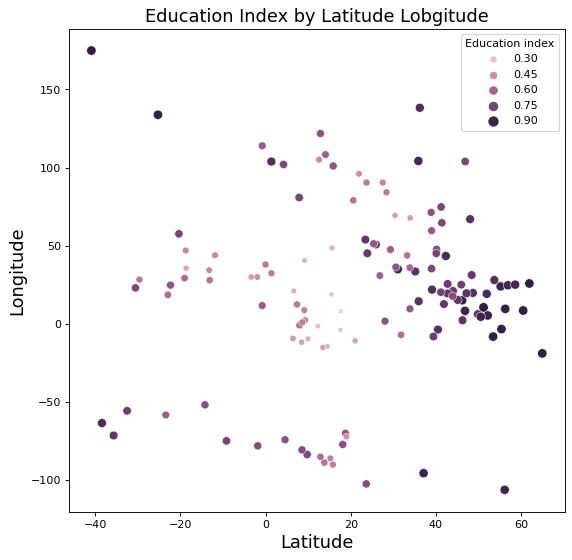

In [81]:
#bir eksik veriyi doldurmak için regresyon aranıyor:
plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot('Latitude', 'Longitude', data=df_happiness2,
hue='Education index',size='Education index'); plt.title('Education Index by Latitude Lobgitude', size=16); 
plt.xlabel('Latitude', size=16); plt.ylabel('Longitude', size=16) 

C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Road traffic death rate')

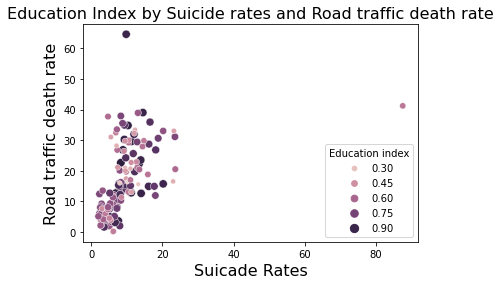

In [82]:
#bir eksik veriyi doldurmak için regresyon aranıyor: sss
sns.scatterplot('Suicide rates est per 100000 people', 'Road traffic death rate (per 100 000 population)', data=df_happiness2,
hue='Education index',size='Education index'); plt.title('Education Index by Suicide rates and Road traffic death rate', size=16); 
plt.xlabel('Suicade Rates', size=16); plt.ylabel('Road traffic death rate', size=16) 

In [83]:
df_happiness_no_outlier = df_happiness2.loc[df_happiness2['Road traffic death rate (per 100 000 population)']<80]
df_happiness_no_outlier=df_happiness_no_outlier.loc[df_happiness_no_outlier['Suicide rates est per 100000 people']<60]
df_happiness_no_outlier 

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population),Education index
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151,49.597738,13.4,22.2,0.927
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785,42.668685,7.6,3.6,0.920
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946,48.638747,9.9,14.9,0.930
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835,40.195043,11.2,12.8,0.926
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266,37.561336,9.3,30.2,0.914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,129,Sierra Leone,4.374,0.268,0.841,0.242,0.309,0.252,0.045,72180.0,7813215.0,25.706764,8.460555,-11.779889,0.683012,11.3,13.0,0.406
127,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499,0.378408,7.4,21.1,0.426
128,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5,11.3,0.482
130,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928,11.2,22.7,0.456


C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Road traffic death rate')

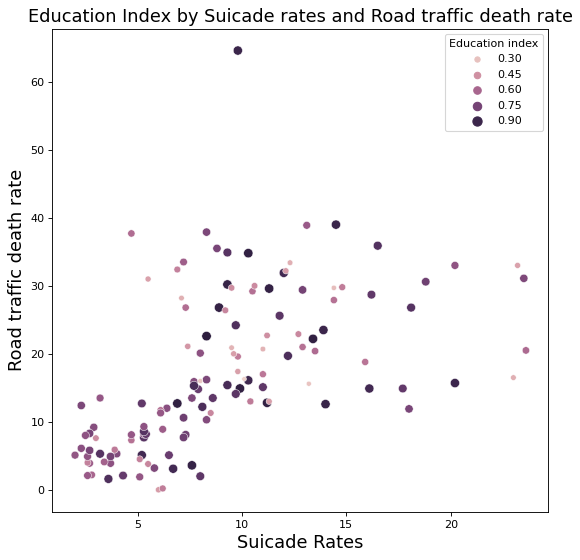

In [84]:
#bir eksik veriyi doldurmak için regresyon aranıyor:
plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot('Suicide rates est per 100000 people', 'Road traffic death rate (per 100 000 population)', data=df_happiness_no_outlier,
hue='Education index',size='Education index'); plt.title('Education Index by Suicade rates and Road traffic death rate', size=16); 
plt.xlabel('Suicade Rates', size=16); plt.ylabel('Road traffic death rate', size=16) 

In [85]:
df_happiness_no_outlier2=df_happiness_no_outlier.loc[df_happiness_no_outlier['Road traffic death rate (per 100 000 population)']<60]
df_happiness_no_outlier2

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population),Education index
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151,49.597738,13.4,22.2,0.927
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785,42.668685,7.6,3.6,0.920
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946,48.638747,9.9,14.9,0.930
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835,40.195043,11.2,12.8,0.926
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266,37.561336,9.3,30.2,0.914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,129,Sierra Leone,4.374,0.268,0.841,0.242,0.309,0.252,0.045,72180.0,7813215.0,25.706764,8.460555,-11.779889,0.683012,11.3,13.0,0.406
127,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499,0.378408,7.4,21.1,0.426
128,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5,11.3,0.482
130,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928,11.2,22.7,0.456


C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Road traffic death rate')

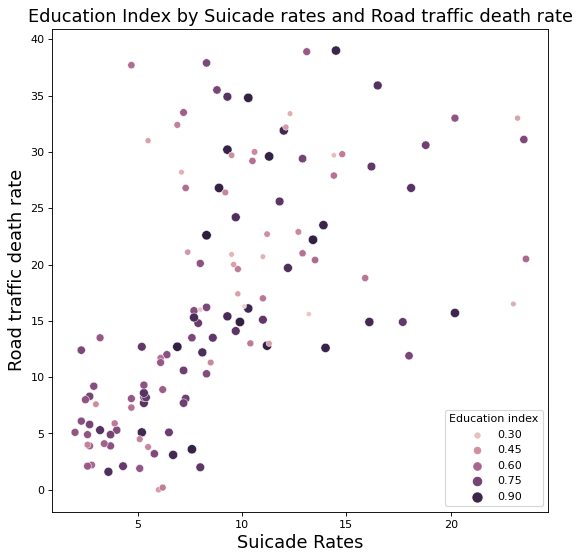

In [86]:
#bir eksik veriyi doldurmak için regresyon aranıyor:
plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot('Suicide rates est per 100000 people', 'Road traffic death rate (per 100 000 population)', data=df_happiness_no_outlier2,
hue='Education index',size='Education index'); plt.title('Education Index by Suicade rates and Road traffic death rate', size=16); 
plt.xlabel('Suicade Rates', size=16); plt.ylabel('Road traffic death rate', size=16) 

LinAlgError: SVD did not converge in Linear Least Squares

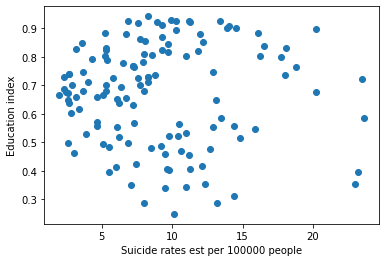

In [87]:
x = df_happiness_no_outlier2['Suicide rates est per 100000 people']
y = df_happiness_no_outlier2['Education index']
plt.xlabel("Suicide rates est per 100000 people")
plt.ylabel("Education index")
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
print(m)
#linear regresyon çok güçlü olmasa da var. bir eksik data buna göre doldurulabilir. ?

In [88]:
df_happiness_no_outlier3=df_happiness_no_outlier2

In [89]:
#daha sonraki çalışmamada reg. olmadığı için veri drop edildi.
df_happiness_no_outlier3=df_happiness_no_outlier2.drop(index=95)
df_happiness_no_outlier3

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population),Education index
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151,49.597738,13.4,22.2,0.927
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785,42.668685,7.6,3.6,0.920
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946,48.638747,9.9,14.9,0.930
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835,40.195043,11.2,12.8,0.926
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266,37.561336,9.3,30.2,0.914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,129,Sierra Leone,4.374,0.268,0.841,0.242,0.309,0.252,0.045,72180.0,7813215.0,25.706764,8.460555,-11.779889,0.683012,11.3,13.0,0.406
127,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499,0.378408,7.4,21.1,0.426
128,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5,11.3,0.482
130,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928,11.2,22.7,0.456


# food data

In [90]:
df_production = pd.read_csv('Production.csv',decimal=',')
df_production

,Country,Production
0,Afghanistan,1669.61
1,Albania,513.04
2,Algeria,4492.58
3,Angola,3741.45
4,Antigua and Barbuda,15.81
...,...,...
168,Venezuela,7749.46
169,Vietnam,57589.18
170,Yemen,2899.36
171,Zambia,2119.80


In [91]:
#merge
df_happiness_no_outlier3 = pd.merge(df_happiness_no_outlier3, df_production, how="left", on="Country")
df_happiness_no_outlier3.tail(3)

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population),Education index,Production
126,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5,11.3,0.482,NaN
127,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928,11.2,22.7,0.456,599.84
128,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,24670.0,12626950.0,25.207712,-1.940278,29.873888,1.350751,9.5,29.7,0.458,625.92


In [92]:
df_test = df_happiness_no_outlier3.loc[df_happiness_no_outlier3['Production'].isna()]
df_test 

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population),Education index,Production
25,34,Singapore,6.262,1.572,1.463,1.141,0.556,0.271,0.453,709.0,5703569.0,27.000000,1.352083,103.819836,23.146911,9.7,24.2,0.844,NaN
28,37,Bahrain,6.199,1.362,1.368,0.871,0.536,0.255,0.110,779.0,1641172.0,26.500000,25.930414,50.637772,9.777936,7.2,10.6,0.769,NaN
86,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270,627340.0,15442905.0,26.266667,5.152149,46.199616,0.239826,14.7,13.6,NaN,NaN
109,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180,25680.0,11530580.0,23.800000,-3.373056,29.918886,1.210079,12.1,32.2,0.417,NaN
118,29,Qatar,6.374,1.684,1.313,0.871,0.555,0.220,0.167,11490.0,2832067.0,26.540146,25.354826,51.183884,23.138243,4.7,8.1,0.659,NaN
120,95,Bhutan,5.082,0.813,1.321,0.604,0.457,0.370,0.167,38144.0,763092.0,26.648695,27.514162,90.433601,4.243262,5.1,4.5,0.496,NaN
126,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5,11.3,0.482,NaN


C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Longitude')

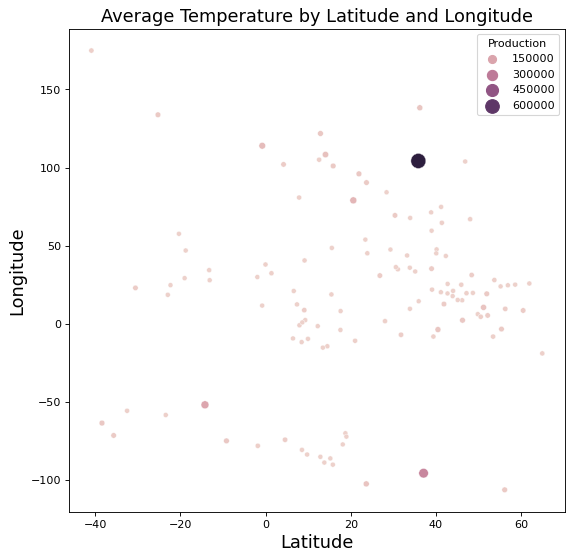

In [93]:
#eksik veriler koordinat ile tahmin edilebilir mi? 
plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot('Latitude', 'Longitude', data=df_happiness_no_outlier3,
hue='Production',size='Production',sizes=(20, 180)); plt.title('Average Temperature by Latitude and Longitude', size=16); 
plt.xlabel('Latitude', size=16); plt.ylabel('Longitude', size=16) 
#mor olan büyük value China, bu çıkarılıp ortalama alınarak eksik veriler doldurulacak

In [94]:

df_happiness_no_outlier4 = df_happiness_no_outlier3.loc[df_happiness_no_outlier3['Country'] != 'China' ]   


C:\Users\Aybuke Guzel\miniconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Longitude')

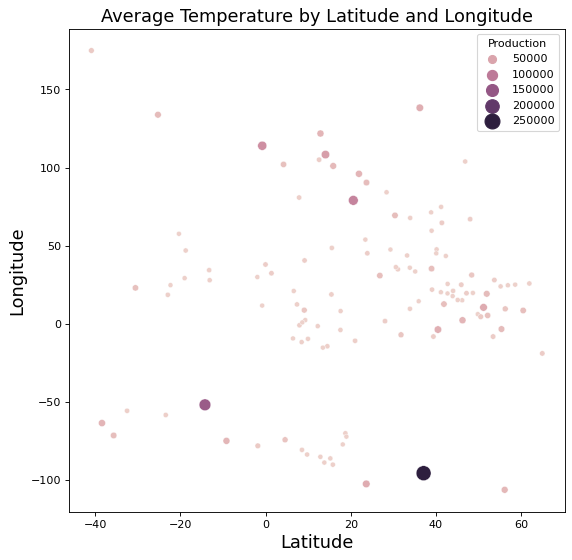

In [95]:
#eksik veriler koordinat ile tahmin edilebilir mi? 
plt.figure(figsize=(8, 8), dpi=80)
sns.scatterplot('Latitude', 'Longitude', data=df_happiness_no_outlier4,
hue='Production',size='Production',sizes=(20, 180)); plt.title('Average Temperature by Latitude and Longitude', size=16); 
plt.xlabel('Latitude', size=16); plt.ylabel('Longitude', size=16) 
#mor olan büyük value China, bu çıkarılıp ortalama alınarak eksik veriler doldurulacak

In [96]:
#regression bulunamadığı için eksikler mean ile doldurulacak
df_happiness_no_outlier3=df_happiness_no_outlier3.fillna(df_happiness_no_outlier3.mean())

In [99]:
df_happiness_no_outlier3

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Land area,Population,Average temperature,Latitude,Longitude,Doctors per 10000 people,Suicide rates est per 100000 people,Road traffic death rate (per 100 000 population),Education index,Production
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,303910.0,5520314.0,4.000000,61.924110,25.748151,49.597738,13.4,22.2,0.927,2987.730000
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,40000.0,5818553.0,9.100000,56.263920,9.501785,42.668685,7.6,3.6,0.920,13595.420000
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,365145.0,5347896.0,5.433333,60.472024,8.468946,48.638747,9.9,14.9,0.930,19775.710000
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,100250.0,361313.0,4.300000,64.963051,-19.020835,40.195043,11.2,12.8,0.926,6013.020000
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,33670.0,17332850.0,10.200000,52.132633,5.291266,37.561336,9.3,30.2,0.914,17170.530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,129,Sierra Leone,4.374,0.268,0.841,0.242,0.309,0.252,0.045,72180.0,7813215.0,25.706764,8.460555,-11.779889,0.683012,11.3,13.0,0.406,1253.310000
125,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033,96320.0,4937374.0,25.608401,6.428055,-9.429499,0.378408,7.4,21.1,0.426,250.920000
126,142,Comoros,3.973,0.274,0.757,0.505,0.142,0.275,0.078,1861.0,850886.0,24.740999,-11.875001,43.872219,1.726519,8.5,11.3,0.482,24769.933279
127,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110,27560.0,11263077.0,26.221933,18.971187,-72.285215,2.480928,11.2,22.7,0.456,599.840000


In [98]:
df_happiness_no_outlier3.to_csv('df_happiness_eclat2.csv')